# Model with conditional interaction

In this example, we show global effects of a model with conditional interactions using PDP, ALE, and RHALE.
In particular, we:

1. show how to use `effector` to estimate the global effects using PDP, ALE, and RHALE
2. provide the analytical formulas for the global effects
3. test that (1) and (2) match

We will use the following model:

$$
f(x_1, x_2, x_3, x_4) = 
\begin{cases} 
-x_1^2 & \text{if } x_2 < 0 \text{ and } x_3 < 0, \\ 
x_1^2 & \text{if } x_2 < 0 \text{ and } x_3 \geq 0, \\ 
-x_1^4 & \text{if } x_2 \geq 0 \text{ and } x_3 < 0, \\ 
x_1^4 & \text{if } x_2 \geq 0 \text{ and } x_3 \geq 0 
\end{cases} 
+ e^{x_4}.
$$

Here, the features $x_1$, $x_2$, $x_3$, $x_4$ are independent and uniformly distributed in the interval $[-1, 1]$.

The model exhibits _interactions_ between $x_1$, $x_2$, and $x_3$, caused by the piecewise terms. 

This means the effect of $x_1$ on the output $y$ depends on the values of both $x_2$ and $x_3$, and vice versa. These interactions make it challenging to isolate the individual contributions of $x_1$, $x_2$, and $x_3$. Each global effect method has a different strategy to handle such multi-way interactions.

On the other hand, $x_4$ does not interact with any other feature, so its effect can be easily computed as $e^{x_4}$.

Below, we will see how methods like PDP, ALE, and RHALE handle these interactions and compute feature effects in this updated model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import effector

np.random.seed(21)

model = effector.models.ConditionalInteraction4Regions()
dataset = effector.datasets.IndependentUniform(dim=4, low=-1, high=1)
x = dataset.generate_data(1000)

/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/global_effect_ale.py:256: SyntaxWarning: invalid escape sequence '\h'
  """
/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/global_effect_ale.py:410: SyntaxWarning: invalid escape sequence '\h'
  """
/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/utils.py:13: SyntaxWarning: invalid escape sequence '\o'
  """Compute the local effects, permuting the feature of interest using the bin limits.
/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/utils.py:110: SyntaxWarning: invalid escape sequence '\m'
  """Compute the mean effect in each bin.
/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/utils.py:166: SyntaxWarning: invalid escape sequence '\m'
  """
/Users/dimitriskyriakopoulos/Documents/ath/RAM/ath_eff_ccds/effector/effector/utils.py:286: SyntaxWarning: invalid escape sequence '\m'
  """Compute 

## PDP

### Effector

Let's see below the PDP effects for each feature, using `effector`.

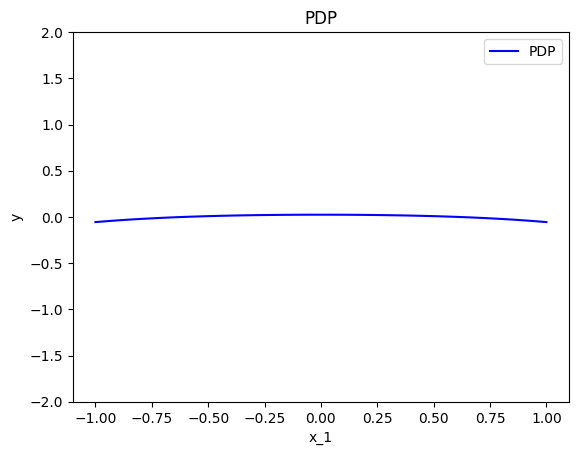

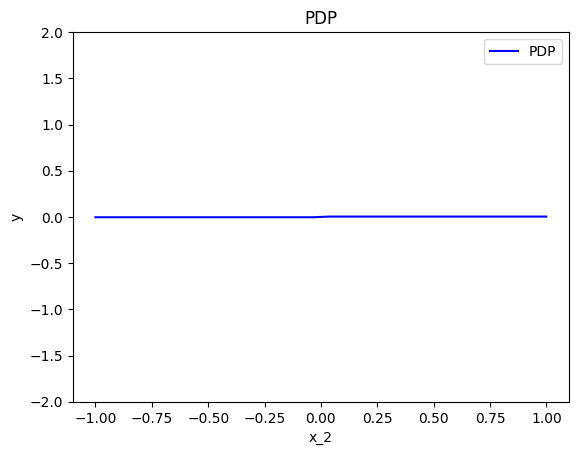

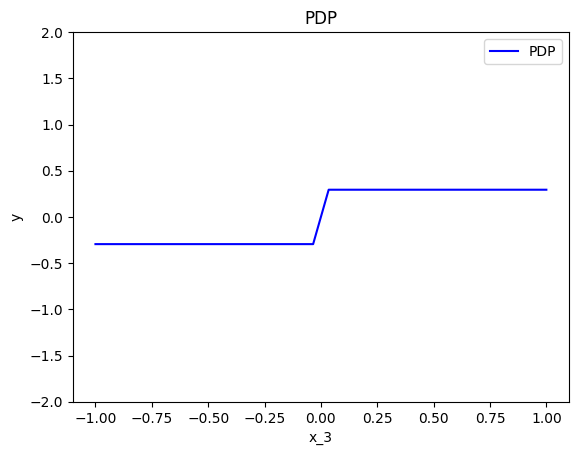

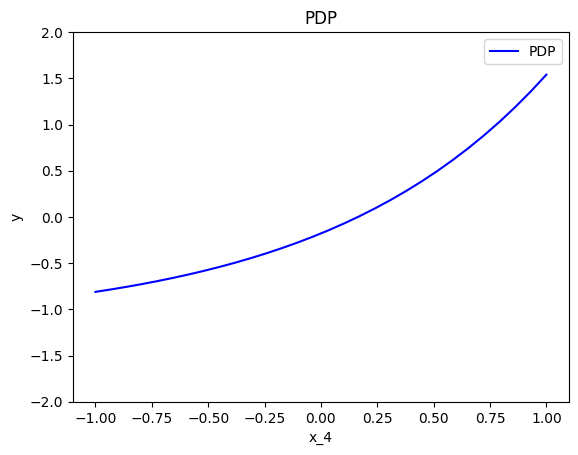

In [2]:
pdp = effector.PDP(x, model.predict, dataset.axis_limits)
pdp.fit(features="all", centering=True)
for feature in [0, 1, 2, 3]:
    pdp.plot(feature=feature, centering=True, y_limits=[-2, 2])

PDP states that:

$x_1$ has a zero average effect on the model output because the symmetric contributions of its positive and negative terms cancel each other out.

$x_2$ has a constant effect close to zero for both $x_2 < 0$ and $x_2 \geq 0$. There is no significant change in $y$ when moving between $x_2^-$ and $x_2^+$, as the average effects cancel out.

$x_3$ has a stepwise effect on the model output:  
- For $x_3 < 0$, the average contribution is $-\frac{4}{15}$.  
- For $x_3 \geq 0$, the average contribution is $+\frac{4}{15}$.  

$x_4$ has an effect of $e^{x_4}$


### Derivations

How PDP leads to these explanations? Are they meaningfull? Let's have some analytical derivations.
If you don't care about the derivations, skip the following three cells and go directly to the coclusions.

For $x_1$:

$$
\begin{align}
PDP(x_1) &\propto \frac{1}{N} \sum_{i=1}^{N} f(x_1, \mathbf{x}^i_{/1}) \\
&\propto \frac{1}{N} \sum_{i=1}^{N} \Big( -x_1^2 \mathbb{1}_{x_2^i < 0 \land x_3^i < 0} 
+ x_1^2 \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0} \\
&\quad -x_1^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0} 
+ x_1^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} + e^{x_4^i} \Big) \\
&\propto \frac{1}{N} \Big( x_1^2 \sum_{i=1}^{N} \big( -\mathbb{1}_{x_2^i < 0 \land x_3^i < 0} 
+ \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0} \big) \\
&\quad + x_1^4 \sum_{i=1}^{N} \big( -\mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0} 
+ \mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} \big) 
+ \sum_{i=1}^{N} e^{x_4^i} \Big) \\
&\approx c
\end{align}
$$


For $x_2$:

$$
PDP(x_2) \propto \frac{1}{N} \sum_{i=1}^N f(\mathbf{x}_{/2}^i, x_2),
$$

Taking the expectation over $x_1, x_3, x_4$, we find:

1. For $x_2 < 0$:

$$
PDP(x_2 < 0) \propto 0.5 \cdot \mathbb{E}[-x_1^2] + 0.5 \cdot \mathbb{E}[x_1^2] \approx 0,
$$


2. For $x_2 \geq 0$:

$$
PDP(x_2 \geq 0) \propto 0.5 \cdot \mathbb{E}[-x_1^4] + 0.5 \cdot \mathbb{E}[x_1^4] \approx 0,
$$


Thus:

$$
PDP(x_2) \approx c.
$$


For $x_3$:

$$
PDP(x_3) \propto \frac{1}{N} \sum_{i=1}^N f(\mathbf{x}_{/3}^i, x_3),
$$

Taking the expectation over $x_1, x_2, x_4$, we find:

1. For $x_3 < 0$:

$$
PDP(x_3 < 0) \propto 0.5 \cdot \mathbb{E}[-x_1^2] + 0.5 \cdot \mathbb{E}[-x_1^4],
$$

$$
PDP(x_3 < 0) \propto -\frac{4}{15}.
$$

2. For $x_3 \geq 0$:

$$
PDP(x_3 \geq 0) \propto 0.5 \cdot \mathbb{E}[x_1^2] + 0.5 \cdot \mathbb{E}[x_1^4],
$$

$$
PDP(x_3 \geq 0) \propto \frac{4}{15}.
$$

Thus, the global PDP for $x_3$ is a step function:

$$
PDP(x_3) = 
\begin{cases} 
-\frac{4}{15} & \text{if } x_3 < 0, \\ 
\frac{4}{15} & \text{if } x_3 \geq 0.
\end{cases}
$$


For $x_4$:

\begin{align}
PDP(x_4) &\propto \frac{1}{N} \sum_{i=1}^{n} f(x_4, x_{/4}^i) \\
&\propto e^{x_4} + c\\
\end{align}

### Conclusions

Are the PDP effects intuitive?

- For $x_1$:  
  The effect is zero. The terms related to $x_1$ are $-x_1^2 \mathbb{1}_{x_3 < 0} + x_1^2 \mathbb{1}_{x_3 \geq 0}$ when $x_2 < 0$, and $-x_1^4 \mathbb{1}_{x_3 < 0} + x_1^4 \mathbb{1}_{x_3 \geq 0}$ when $x_2 \geq 0$. Since $x_2, x_3 \sim \mathcal{U}(-1,1)$, the symmetric distribution of these variables ensures that, on average, the positive and negative contributions of $x_1$ cancel out.

- For $x_2$:  
  The effect is constant and close to zero for both $x_2 < 0$ and $x_2 \geq 0$. The terms involving $x_2$ are $-x_1^2 \mathbb{1}_{x_3 < 0} + x_1^2 \mathbb{1}_{x_3 \geq 0}$ for $x_2 < 0$, and $-x_1^4 \mathbb{1}_{x_3 < 0} + x_1^4 \mathbb{1}_{x_3 \geq 0}$ for $x_2 \geq 0$. These terms cancel on average due to the uniform distribution of $x_1$ and $x_3$. 

- For $x_3$:  
  The effect is stepwise:  
  - For $x_3 < 0$, the terms $-x_1^2 \mathbb{1}_{x_2 < 0} - x_1^4 \mathbb{1}_{x_2 \geq 0}$ contribute an average of $-\frac{4}{15}$.  
  - For $x_3 \geq 0$, the terms $x_1^2 \mathbb{1}_{x_2 < 0} + x_1^4 \mathbb{1}_{x_2 \geq 0}$ contribute an average of $+\frac{4}{15}$.  

- For $x_4$:  
  The effect is $e^{x_4}$, as expected, since the $e^{x_4}$ term is independent of other variables and directly contributes to the output.


In [3]:
def compute_centering_constant(func, start, stop, nof_points):
    x = np.linspace(start, stop, nof_points)
    y = func(x)
    return np.mean(y)


def pdp_ground_truth(feature, xs):
    if feature == 0:
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 1:
        ff = lambda x: -1 / 3 * (x < 0) + 1 / 3 * (x >= 0)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 2:
        ff = lambda x: np.exp(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z

In [4]:
def compute_centering_constant(func, start, stop, nof_points):
    x = np.linspace(start, stop, nof_points)
    y = func(x)
    return np.mean(y)

def pdp_ground_truth(feature, xs):
    if feature == 0:  
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 1:  
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 2: 
        ff = lambda x: -4 / 15 * (x < 0) + 4 / 15 * (x >= 0)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 3:  
        ff = lambda x: np.exp(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z


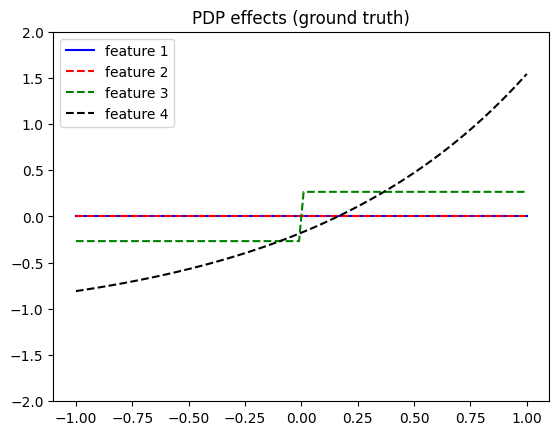

In [5]:
xx = np.linspace(-1, 1, 100)
y_pdp = []
for feature in [0, 1, 2, 3]:
    y_pdp.append(pdp_ground_truth(feature, xx))

plt.figure()
plt.title("PDP effects (ground truth)")
color_pallette = ["blue", "red", "green", "black"]
for feature in [0, 1, 2, 3]:
    plt.plot(
        xx, 
        y_pdp[feature], 
        color=color_pallette[feature], 
        linestyle="--" if feature !=0 else "-",
        label=f"feature {feature + 1}"
    )
plt.legend()
plt.xlim([-1.1, 1.1])
plt.ylim([-2, 2])
plt.show()


In [6]:
# make a test
xx = np.linspace(-1, 1, 100)
for feature in [0, 1, 2, 3]:
    y_pdp = pdp.eval(feature=feature, xs=xx, centering=True)
    y_gt = pdp_ground_truth(feature, xx)
    np.testing.assert_allclose(y_pdp, y_gt, atol=1e-1)

## ALE

### Effector

Let's see below the PDP effects for each feature, using `effector`.

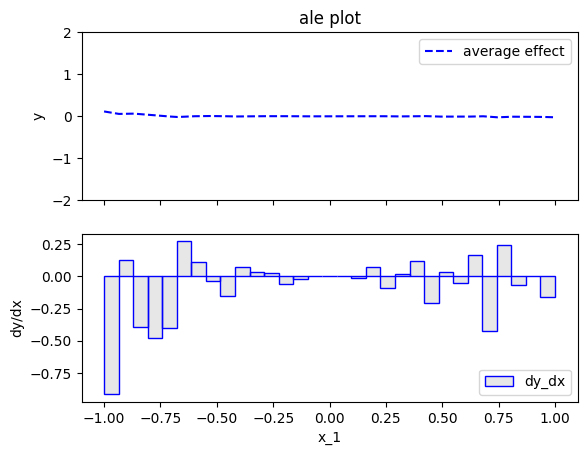

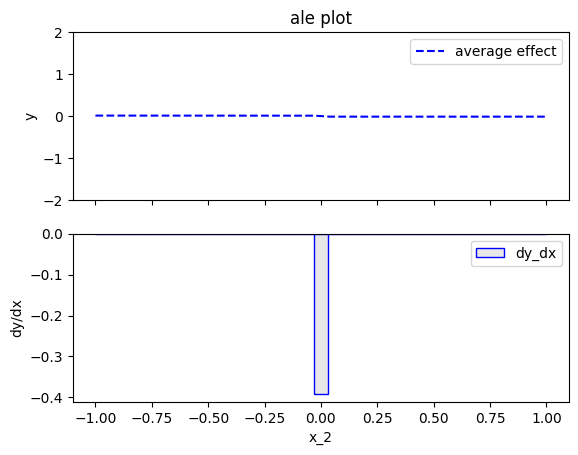

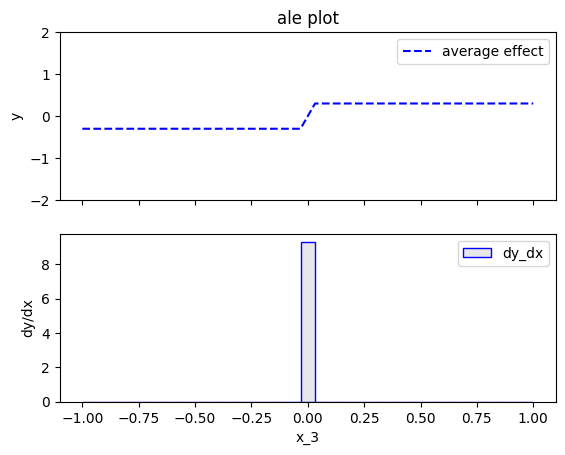

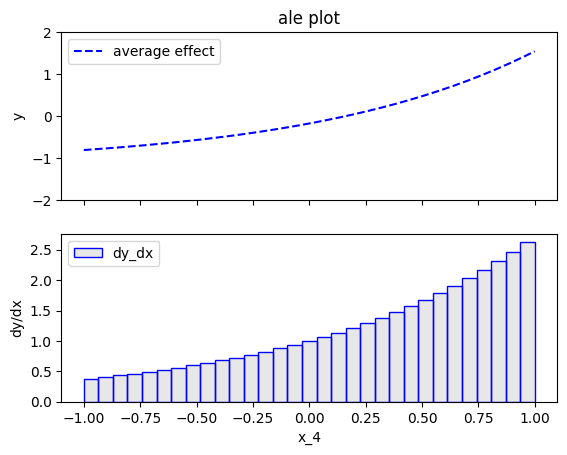

In [7]:
ale = effector.ALE(x, model.predict, axis_limits=dataset.axis_limits)
ale.fit(features="all", centering=True, binning_method=effector.binning_methods.Fixed(nof_bins=31))

for feature in [0, 1, 2, 3]:
    ale.plot(feature=feature, centering=True, y_limits=[-2, 2])

ALE states that:



### Derivations

For $x_1$:

$$
\begin{align}
ALE(x_1) &\propto \sum_{k=1}^{k_{x_1}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \left[ f(z_k, x_2^i, x_3^i, x_4^i) - f(z_{k-1}, x_2^i, x_3^i, x_4^i) \right] \\
&\propto \sum_{k=1}^{k_{x_1}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ 
(-z_k^2 \mathbb{1}_{x_2^i < 0 \land x_3^i < 0} + z_k^2 \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0} \\
&\quad - z_k^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0} + z_k^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} + e^{x_4^i}) \\
&\quad - \big( -z_{k-1}^2 \mathbb{1}_{x_2^i < 0 \land x_3^i < 0} + z_{k-1}^2 \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0} \\
&\quad - z_{k-1}^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0} + z_{k-1}^4 \mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} + e^{x_4^i}) \Big] \\
&\propto \sum_{k=1}^{k_{x_1}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ 
- z_k^2 (\mathbb{1}_{x_2^i < 0 \land x_3^i < 0} - \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0}) \\
&\quad + z_k^4 (\mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} - \mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0}) \\
&\quad + z_{k-1}^2 (\mathbb{1}_{x_2^i < 0 \land x_3^i < 0} - \mathbb{1}_{x_2^i < 0 \land x_3^i \geq 0}) \\
&\quad - z_{k-1}^4 (\mathbb{1}_{x_2^i \geq 0 \land x_3^i \geq 0} - \mathbb{1}_{x_2^i \geq 0 \land x_3^i < 0}) \Big] \\
&\propto \sum_{k=1}^{k_{x_1}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ 0 \Big] \\
&\approx 0.
\end{align}
$$


For $x_2$:

$$
\begin{align}
ALE(x_2) &\propto \sum_{k=1}^{k_{x_2}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \left[ f(x^i_1, z_k, x^i_3, x^i_4) - f(x^i_1, z_{k-1}, x^i_3, x^i_4) \right] \\
&\propto \sum_{k=1}^{k_{x_2}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ (-x_1^2 \mathbb{1}_{z_k < 0} + x_1^2 \mathbb{1}_{z_k \geq 0} + e^{x_4^i}) \\
&\quad - (-x_1^2 \mathbb{1}_{z_{k-1} < 0} + x_1^2 \mathbb{1}_{z_{k-1} \geq 0} + e^{x_4^i}) \Big] \\
&\propto \sum_{k=1}^{k_{x_2}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ -x_1^2 (\mathbb{1}_{z_k < 0} - \mathbb{1}_{z_{k-1} < 0}) 
+ x_1^2 (\mathbb{1}_{z_k \geq 0} - \mathbb{1}_{z_{k-1} \geq 0}) \Big] \\
&\propto \sum_{k=1}^{k_{x_2}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \Big[ -x_1^2 \underbrace{(\mathbb{1}_{z_k < 0} - \mathbb{1}_{z_{k-1} < 0})}_{\approx 0} 
+ x_1^2 \underbrace{(\mathbb{1}_{z_k \geq 0} - \mathbb{1}_{z_{k-1} \geq 0})}_{\approx 0} \Big] \\
&\approx \sum_{k=1}^{k_{x_2}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} 0 \\
&\approx 0.
\end{align}
$$


For $x_4$:

\begin{align}
ALE(x_4) &\propto \sum_{k=1}^{k_{x_4}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \left[ f(x_i^1, x_i^2, x_i^3, z_k) - f(x_i^1, x_i^2, x_i^3, z_{k-1}) \right] \\
&\propto \sum_{k=1}^{k_{x_4}} \frac{1}{| \mathcal{S}_k |} \sum_{i: x^{(i)} \in \mathcal{S}_k} \left[ e^{z_k} - e^{z_{k-1}} \right] \\
&\approx e^{x_3}
\end{align}



In [8]:
def compute_centering_constant(func, start, stop, nof_points):
    x = np.linspace(start, stop, nof_points)
    y = func(x)
    return np.mean(y)

def ale_ground_truth(feature, xs):
    if feature == 0:  
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 1:  
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 2: 
        ff = lambda x: -4 / 15 * (x < 0) + 4 / 15 * (x >= 0)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 3:  
        ff = lambda x: np.exp(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z


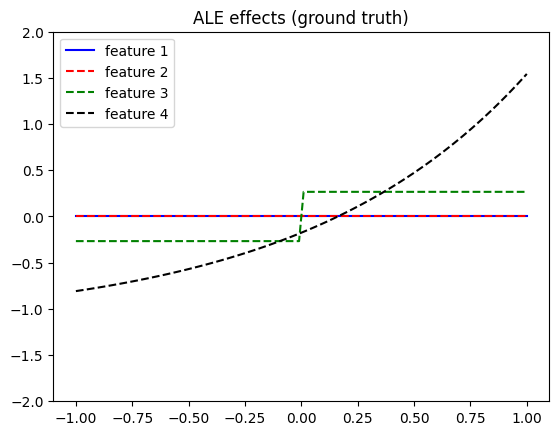

In [9]:
xx = np.linspace(-1, 1, 100)
y_ale = []
for feature in [0, 1, 2, 3]:
    y_ale.append(ale_ground_truth(feature, xx))
    
plt.figure()
plt.title("ALE effects (ground truth)")
color_pallette = ["blue", "red", "green", "black"]
for feature in [0, 1, 2, 3]:
    plt.plot(
        xx, 
        y_ale[feature], 
        color=color_pallette[feature], 
        linestyle="--" if feature !=0 else "-",
        label=f"feature {feature + 1}"
    )
plt.legend()
plt.xlim([-1.1, 1.1])
plt.ylim([-2, 2])
plt.show()
    

In [10]:
xx = np.linspace(-1, 1, 100)
for feature in [1]:# [0, 1, 2]:
    y_ale = ale.eval(feature=feature, xs=xx, centering=True)
    y_gt = ale_ground_truth(feature, xx)
    
    # hack to remove the effect at undefined region
    if feature == 1:
        K = 31
        ind = np.logical_and(xx > -1/K, xx < 1/K)
        y_ale[ind] = 0
        y_gt[ind] = 0
    
    np.testing.assert_allclose(y_ale, y_gt, atol=1e-1)
    

### Conclusions

Are the ALE effects intuitive?

ALE effects are identical to PDP effects which, as discussed above, can be considered intutive.

## RHALE

### Effector

Let's see below the RHALE effects for each feature, using `effector`.

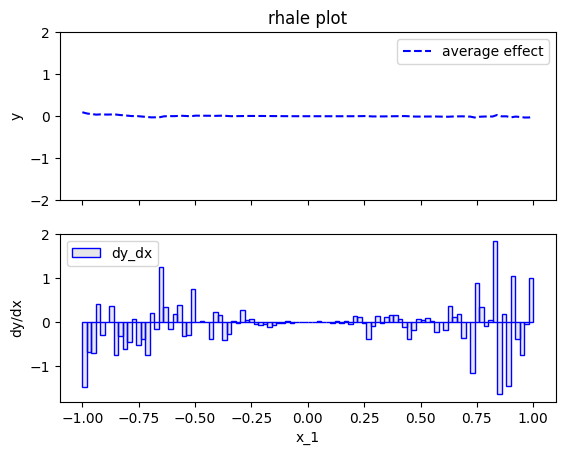

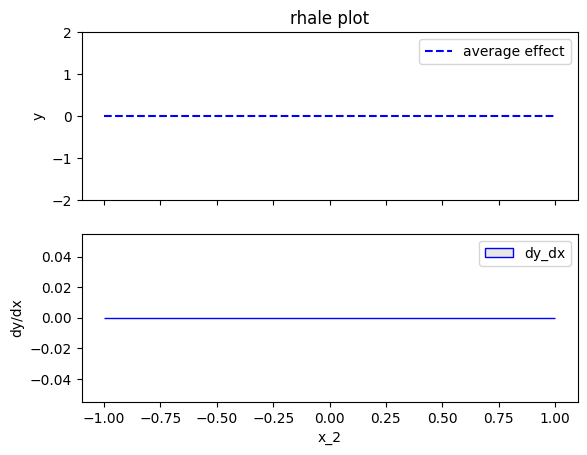

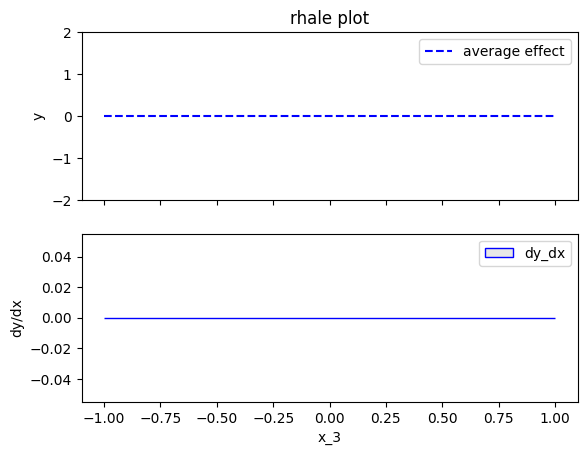

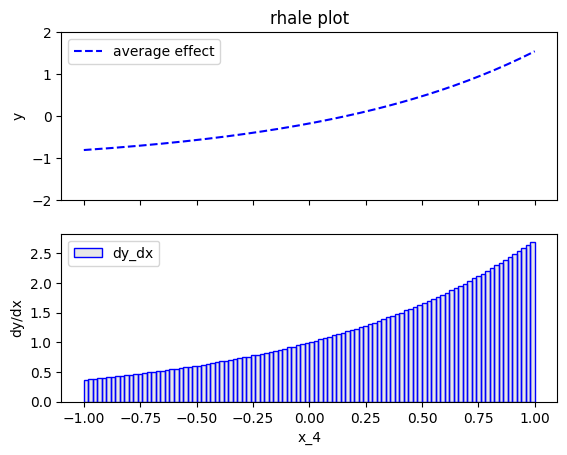

In [11]:
rhale = effector.RHALE(x, model.predict, model.jacobian, axis_limits=dataset.axis_limits)
rhale.fit(features="all", centering=True)

for feature in [0, 1, 2, 3]:
    rhale.plot(feature=feature, centering=True, y_limits=[-2, 2])

RHALE states that:



### Derivations

In [12]:
def rhale_ground_truth(feature, xs):
    if feature == 0:
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 1:
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 2:
        K = 31
        ff = lambda x: np.zeros_like(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z
    elif feature == 3:
        ff = lambda x: np.exp(x)
        z = compute_centering_constant(ff, -1, 1, 1000)
        return ff(xs) - z


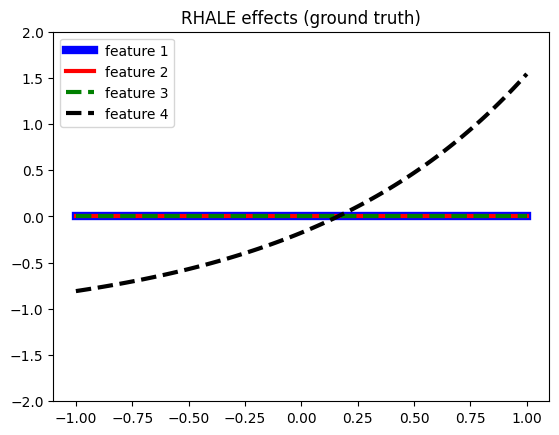

In [13]:
xx = np.linspace(-1, 1, 100)
y_rhale = []
for feature in [0, 1, 2, 3]:
    y_rhale.append(rhale_ground_truth(feature, xx))
    
plt.figure()
plt.title("RHALE effects (ground truth)")
color_pallette = ["blue", "red", "green", "black"]
for feature in [0, 1, 2, 3]:
    plt.plot(
        xx, 
        y_rhale[feature], 
        color=color_pallette[feature], 
        linestyle="-" if feature in [0,1] else "--",
        linewidth=6 if feature == 0 else 3,
        label=f"feature {feature + 1}"
    )
plt.legend()
plt.xlim([-1.1, 1.1])
plt.ylim([-2, 2])
plt.show()



In [14]:
for feature in [0, 1, 2, 3]:
    y_ale = rhale.eval(feature=feature, xs=xx, centering=True)
    y_gt = rhale_ground_truth(feature, xx)
    np.testing.assert_allclose(y_ale, y_gt, atol=1e-1)

### Conclusions

Are the RHALE effects intuitive?
